In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"; # for GPU 1.

import pandas as pd
import numpy as np
import os
import librosa 
import matplotlib.pyplot as plt
from multiprocessing import  Pool
from functools import partial
import numpy as np
import pickle


In [2]:
f=open('data.pk','rb')
data = pickle.load(f)
f.close()

['air_conditioner']


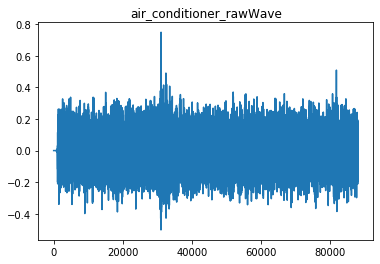

['car_horn']


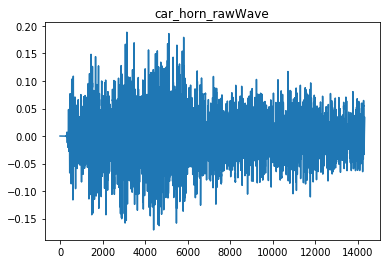

['children_playing']


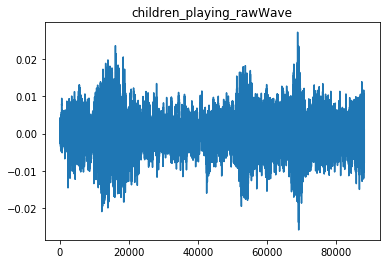

['dog_bark']


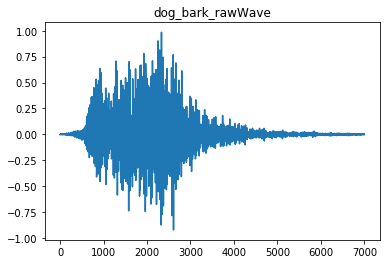

['drilling']


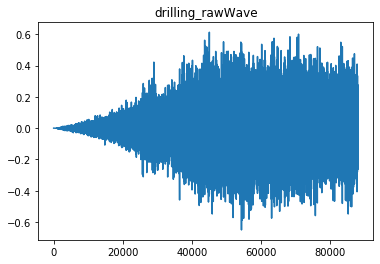

['engine_idling']


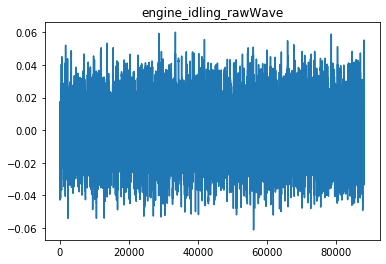

['gun_shot']


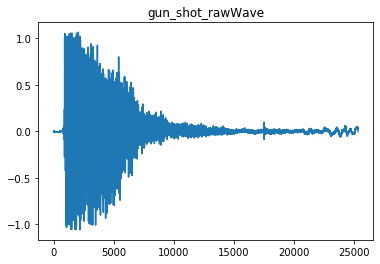

['jackhammer']


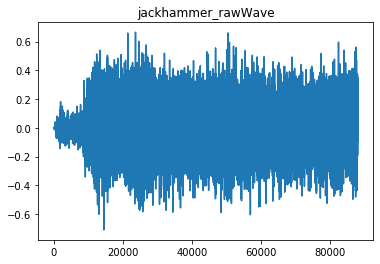

['siren']


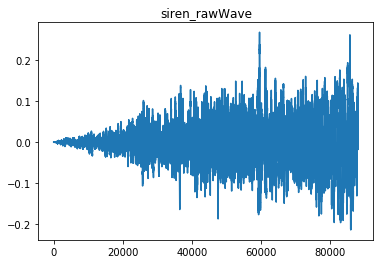

['street_music']


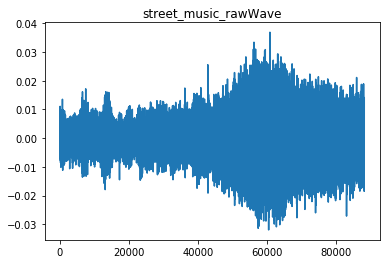

In [3]:
def plotWave(fileName,waveType):
    index = data.loc[data['slice_file_name']==fileName].index.values
    className = data['class'][index].values
    print(className)
    ampls = data['rawWave'][index].values
#     print(ampls[0][0])
    plt.plot(ampls[0][0])
    plt.title(className[0] +'_' + waveType)
    plt.show()
    
# plotWave('100263-2-0-117.wav','rawWave') # children_playing

plotWave('100852-0-0-0.wav','rawWave') # air_conditioner
plotWave('100648-1-0-0.wav','rawWave') # car_horn
plotWave('100263-2-0-117.wav','rawWave') # children_playing
plotWave('100032-3-0-0.wav','rawWave') # dog_bark
plotWave('103199-4-0-0.wav','rawWave') # drilling
plotWave('103249-5-0-1.wav','rawWave') # engine_idling
plotWave('106955-6-0-0.wav','rawWave') # gun_shot
plotWave('110621-7-0-0.wav','rawWave') # jackhammer
plotWave('107357-8-0-0.wav','rawWave') # siren
plotWave('107653-9-0-12.wav','rawWave') # street_music

In [4]:
f=open('dataTrain_2.pk', 'rb')
train_data = pickle.load(f)
f.close()
f=open('dataValid_2.pk', 'rb')
valid_data = pickle.load(f)
f.close()
f=open('dataTest_2.pk', 'rb')
test_data = pickle.load(f)
f.close()

In [5]:
data_resize = pd.concat([train_data, valid_data, test_data]) 

In [6]:
def plotResizeWave(fileName,waveType):
    index = data_resize.loc[data_resize['slice_file_name']==fileName].index.values
    className = data_resize['class'][index].values
    print(className)
    ampls = data_resize['resizeDenoise'][index].values
    print(ampls[0][0])
    plt.plot(ampls[0], 'g')
    plt.title(className[0] +'_' + waveType)
    plt.show()

['air_conditioner']
0.0


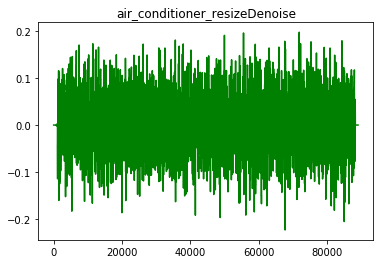

['car_horn']
0.0


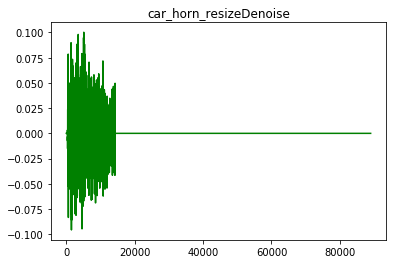

['children_playing']
0.0019104517996311188


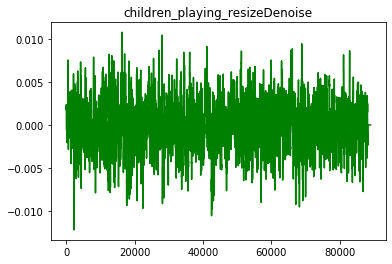

['dog_bark']
0.00022074265871196985


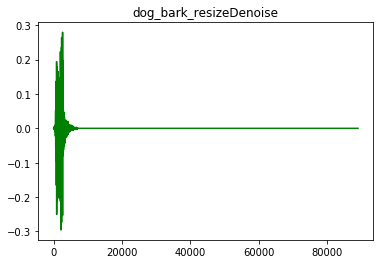

['drilling']
0.0


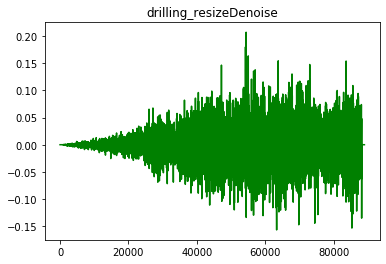

['engine_idling']
-0.0016206636792048812


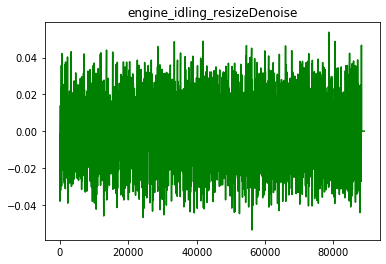

['gun_shot']
0.0005527585162781179


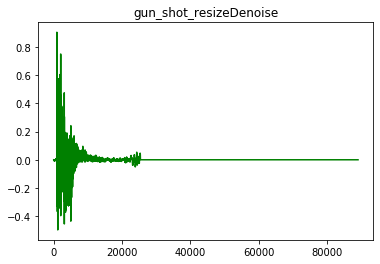

['jackhammer']
0.00027576935826800764


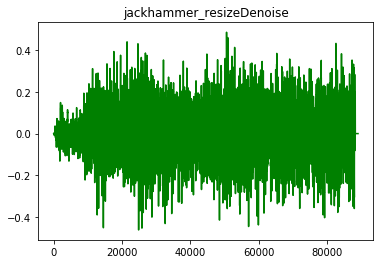

['siren']
-5.238454377831658e-06


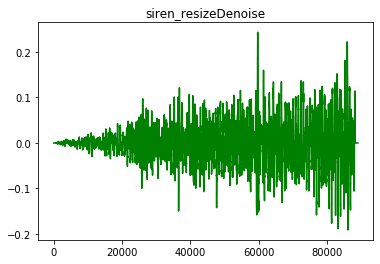

['street_music']
6.772368942620233e-05


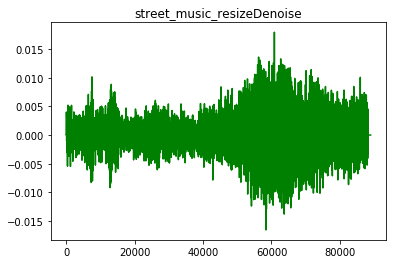

In [7]:
plotResizeWave('100852-0-0-0.wav','resizeDenoise') # air_conditioner
plotResizeWave('100648-1-0-0.wav','resizeDenoise') # car_horn
plotResizeWave('100263-2-0-117.wav','resizeDenoise') # children_playing
plotResizeWave('100032-3-0-0.wav','resizeDenoise') # dog_bark
plotResizeWave('103199-4-0-0.wav','resizeDenoise') # drilling
plotResizeWave('103249-5-0-1.wav','resizeDenoise') # engine_idling
plotResizeWave('106955-6-0-0.wav','resizeDenoise') # gun_shot
plotResizeWave('110621-7-0-0.wav','resizeDenoise') # jackhammer
plotResizeWave('107357-8-0-0.wav','resizeDenoise') # siren
plotResizeWave('107653-9-0-12.wav','resizeDenoise') # street_music

In [8]:
maxLength = 0
for wav in data['rawWave']:
    if len(wav[0]) > maxLength:
        maxLength = len(wav[0])
print(maxLength)

89009


In [9]:
def resizeToMax(row):
#     print(row[0])
    
    sampleWave = row
    unit = sampleWave
    while len(sampleWave)<88200:
        sampleWave=np.append(sampleWave,unit)
        
    return sampleWave[:88200]

data['resizeRepeat']=data['wave'].apply(resizeToMax)

In [10]:
def plotResizeWave(fileName,waveType):
    index = data_resize.loc[data['slice_file_name']==fileName].index.values
    className = data['class'][index].values
    print(className)
    ampls = data['resizeRepeat'][index].values
    print(ampls[0][0])
    plt.plot(ampls[0], 'y')
    plt.title(className[0] +'_' + waveType)
    plt.show()

['air_conditioner']
0.0


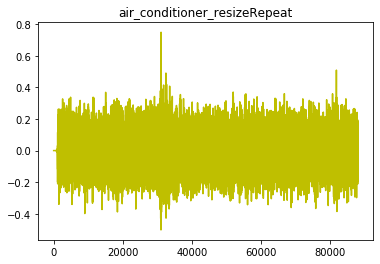

['car_horn']
0.0


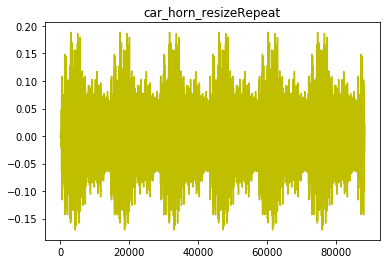

['children_playing']
0.002732961


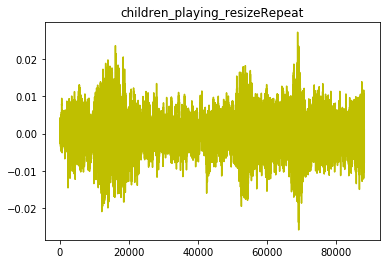

['dog_bark']
-0.0034602168


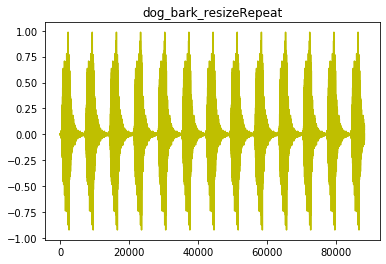

['drilling']
0.0


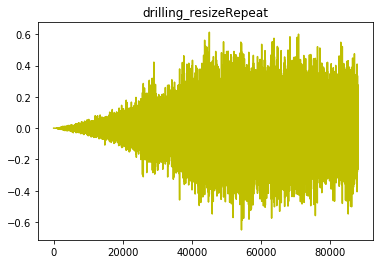

['engine_idling']
-0.0014265265


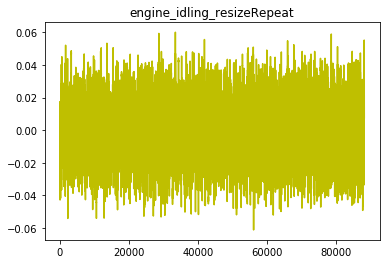

['gun_shot']
7.1961476e-05


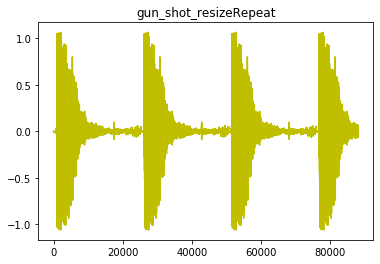

['jackhammer']
1.6105137e-06


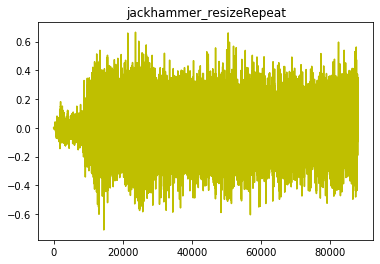

['siren']
-1.1323598e-05


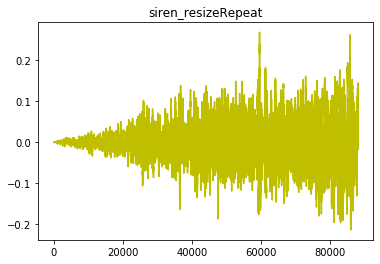

['street_music']
0.0002606146


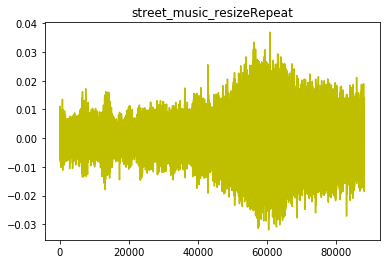

In [11]:
plotResizeWave('100852-0-0-0.wav','resizeRepeat') # air_conditioner
plotResizeWave('100648-1-0-0.wav','resizeRepeat') # car_horn
plotResizeWave('100263-2-0-117.wav','resizeRepeat') # children_playing
plotResizeWave('100032-3-0-0.wav','resizeRepeat') # dog_bark
plotResizeWave('103199-4-0-0.wav','resizeRepeat') # drilling
plotResizeWave('103249-5-0-1.wav','resizeRepeat') # engine_idling
plotResizeWave('106955-6-0-0.wav','resizeRepeat') # gun_shot
plotResizeWave('110621-7-0-0.wav','resizeRepeat') # jackhammer
plotResizeWave('107357-8-0-0.wav','resizeRepeat') # siren
plotResizeWave('107653-9-0-12.wav','resizeRepeat') # street_music

In [12]:
data_resize['resizeRepeat'] = data['resizeRepeat']

In [13]:
data = None
train_data = None
valid_data = None
test_data = None
f = open('data_resize.pk', 'wb')
pickle.dump(data_resize, f)
f.close()